In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import numpy as np
import random
import os
import warnings
import matplotlib.pyplot as plt
import cv2
import timm
import torch
import segmentation_models_pytorch as smp
from typing import Optional, Union, List
np.random.seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
warnings.filterwarnings("ignore")

In [3]:
BASE_DIR = '/kaggle/input/google-research-identify-contrails-reduce-global-warming/train'
N_TIMES_BEFORE = 4

def read_bands(id):
    record_id = os.listdir(BASE_DIR)[id]
    with open(os.path.join(BASE_DIR, record_id, 'band_08.npy'), 'rb') as f:
        ir06_2 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_09.npy'), 'rb') as f:
        ir06_9 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_10.npy'), 'rb') as f:
        ir07_3 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_11.npy'), 'rb') as f:
        ir08_4 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_12.npy'), 'rb') as f:
        ir09_6 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_13.npy'), 'rb') as f:
        ir10_3 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_14.npy'), 'rb') as f:
        ir11_2 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_15.npy'), 'rb') as f:
        ir12_3 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_16.npy'), 'rb') as f:
        ir13_3 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'human_pixel_masks.npy'), 'rb') as f:
        human_pixel_mask = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'human_individual_masks.npy'), 'rb') as f:
        human_individual_mask = np.load(f)

    images = {"ir06_2": ir06_2, "ir06_9": ir06_9, "ir07_3": ir07_3, "ir08_4": ir08_4, "ir09_6": ir09_6, "ir10_3": ir10_3,
              "ir11_2": ir11_2, "ir12_3": ir12_3, "ir13_3": ir13_3, "human_pixel_mask": human_pixel_mask, "human_individual_mask": human_individual_mask}
    return images


def read_bands_(id):
    record_id = os.listdir(BASE_DIR)[id]
    with open(os.path.join(BASE_DIR, record_id, 'band_08.npy'), 'rb') as f:
        band_08 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_09.npy'), 'rb') as f:
        band_09 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_10.npy'), 'rb') as f:
        band_10 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_11.npy'), 'rb') as f:
        band_11 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_12.npy'), 'rb') as f:
        band_12 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_13.npy'), 'rb') as f:
        band_13 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_14.npy'), 'rb') as f:
        band_14 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_15.npy'), 'rb') as f:
        band_15 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'band_16.npy'), 'rb') as f:
        band_16 = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'human_pixel_masks.npy'), 'rb') as f:
        human_pixel_mask = np.load(f)
    with open(os.path.join(BASE_DIR, record_id, 'human_individual_masks.npy'), 'rb') as f:
        human_individual_mask = np.load(f)

    images = {"band_08": band_08, "band_09": band_09, "band_10": band_10, "band_11": band_11, "band_12": band_12, "band_13": band_13,
              "band_14": band_14, "band_15": band_15, "band_16": band_16, "human_pixel_mask": human_pixel_mask, "human_individual_mask": human_individual_mask}
    return images

In [4]:
def normalize_range(data, bounds):
        """Maps data to the range [0, 1]."""
        return (data - bounds[0]) / (bounds[1] - bounds[0])

In [5]:
def ash_color(images):

    R_BOUNDS = (-6.7, 2.6)
    G_BOUNDS = (-6, 6.3)
    B_BOUNDS = (243.6, 302.4)

    r = normalize_range(images["ir12_3"] - images["ir10_3"], R_BOUNDS)
    g = normalize_range(images["ir11_2"] - images["ir08_4"], G_BOUNDS)
    b = normalize_range(images["ir10_3"], B_BOUNDS)
    color = np.clip(np.stack([r, g, b], axis=2), 0, 1)[..., N_TIMES_BEFORE]
    return color


def ash_color_(images):

    R_BOUNDS = (-4, 2)
    G_BOUNDS = (-4, 5)
    B_BOUNDS = (243, 303)

    r = normalize_range(images["band_15"] - images["band_14"], R_BOUNDS)
    g = normalize_range(images["band_14"] - images["band_11"], G_BOUNDS)
    b = normalize_range(images["band_14"], B_BOUNDS)
    images = np.clip(np.stack([r, g, b], axis=2), 0, 1)

    color = np.clip(np.stack([r, g, b], axis=2), 0, 1)[..., N_TIMES_BEFORE]
    return color

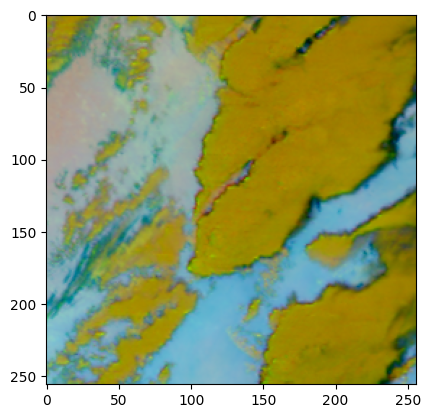

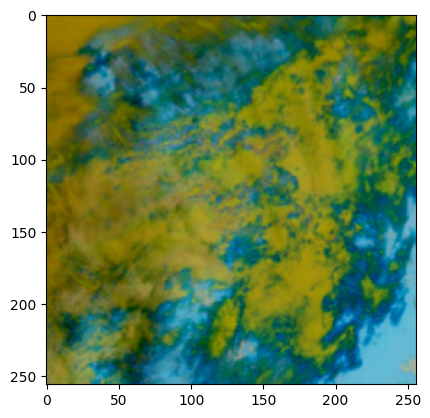

In [6]:
plt.figure()
plt.imshow(ash_color(read_bands(10)))
plt.figure()
plt.imshow(ash_color(read_bands(10128)))

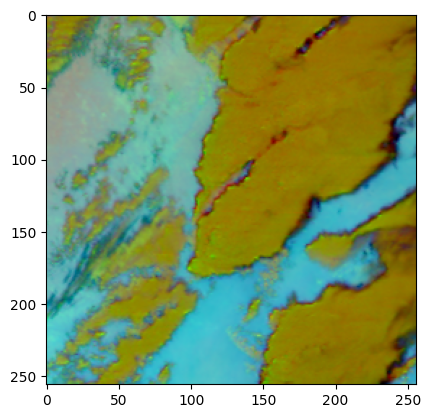

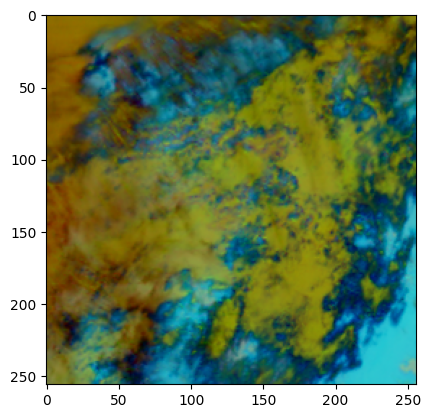

In [8]:
plt.figure()
plt.imshow(ash_color_(read_bands_(10)))
plt.figure()
plt.imshow(ash_color_(read_bands_(10128)))

In [105]:
def SO2_color(images):
    R_BOUNDS = (-4, 2)
    G_BOUNDS = (-4, 5)
    B_BOUNDS = (-30, 30)

    r = normalize_range(images["ir06_9"] - images["ir07_3"], R_BOUNDS)
    g = normalize_range(images["ir10_3"] - images["ir08_4"], G_BOUNDS)
    b = normalize_range(images["ir10_3"], B_BOUNDS)
    color = np.clip(np.stack([r, g, b], axis=2), 0, 1)[..., N_TIMES_BEFORE]
    return color

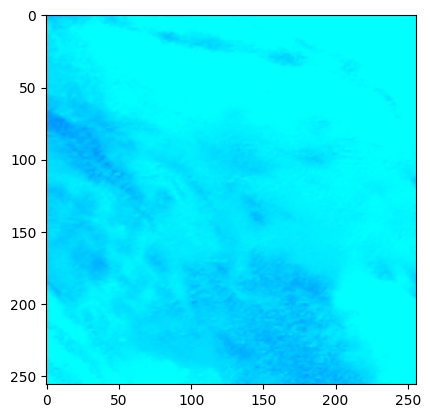

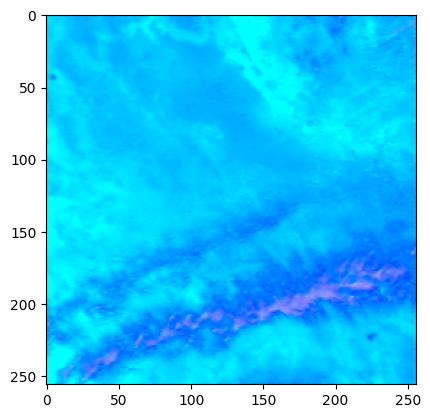

In [106]:
plt.figure()
plt.imshow(SO2_color(read_bands(1)))
plt.figure()
plt.imshow(SO2_color(read_bands(1028)))

In [92]:
def simple_water_vapor_color(images):
    R_BOUNDS = (5.8, -70)
    G_BOUNDS = (-30, -58)
    B_BOUNDS = (-12, -28)

    r = normalize_range(images["ir10_3"], R_BOUNDS)
    g = normalize_range(images["ir06_2"], G_BOUNDS)
    b = normalize_range(images["ir07_3"], B_BOUNDS)
    color = np.stack([r, g, b], axis=2)[..., N_TIMES_BEFORE]
    return color

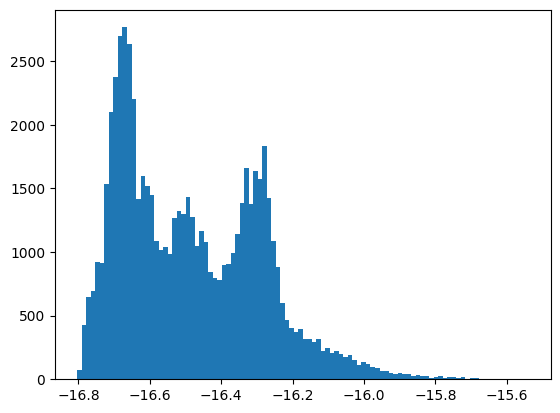

In [93]:
plt.figure()
plt.hist(simple_water_vapor_color(read_bands(1))[:,:,2].flatten(),bins=100);
# plt.figure()
# simple_water_vapor_color(read_bands(1028))

In [107]:
def dust_color(images):
    R_BOUNDS = (-6.7, 2.6)
    G_BOUNDS = (-0.5, 20)
    B_BOUNDS = (-11.9, 15)

    r = normalize_range(images["ir12_3"] - images["ir10_3"], R_BOUNDS)
    g = normalize_range(images["ir11_2"] - images["ir08_4"], G_BOUNDS)
    b = normalize_range(images["ir10_3"], B_BOUNDS)
    color = np.clip(np.stack([r, g, b], axis=2), 0, 1)[..., N_TIMES_BEFORE]
    return color

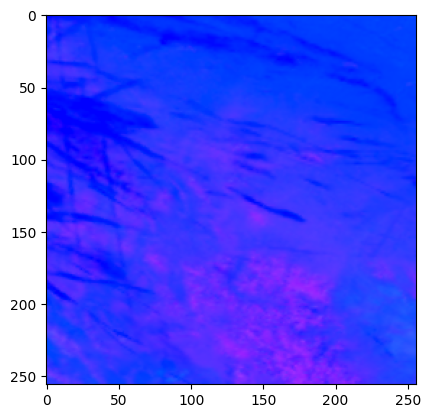

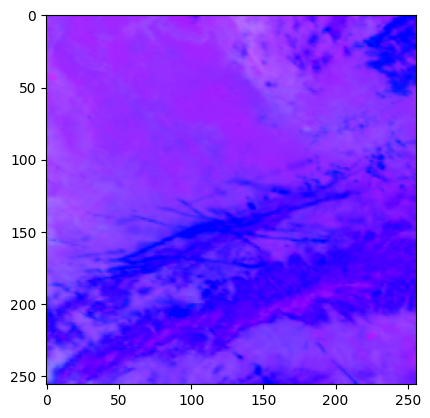

In [108]:
plt.figure()
plt.imshow(dust_color(read_bands(1)))
plt.figure()
plt.imshow(dust_color(read_bands(1028)))

In [109]:
def microphisics_24h_color(images):

    R_BOUNDS = (-4, 2)
    G_BOUNDS = (0, 6)
    B_BOUNDS = (248, 303)

    r = normalize_range(images["ir12_3"] - images["ir10_3"], R_BOUNDS)
    g = normalize_range(images["ir11_2"] - images["ir08_4"], G_BOUNDS)
    b = normalize_range(images["ir10_3"], B_BOUNDS)
    color = np.clip(np.stack([r, g, b], axis=2), 0, 1)[..., N_TIMES_BEFORE]
    return color

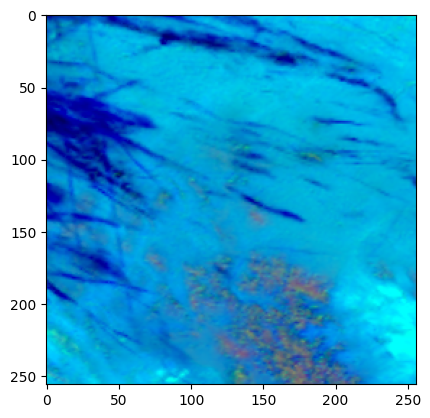

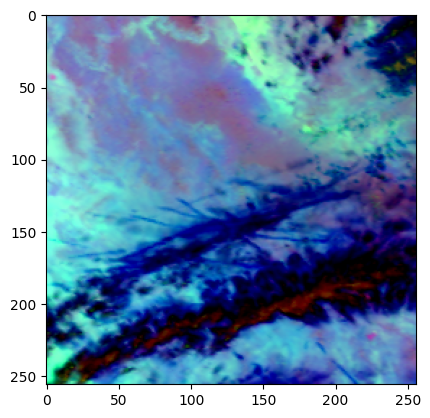

In [110]:
plt.figure()
plt.imshow(microphisics_24h_color(read_bands(1)))
plt.figure()
plt.imshow(microphisics_24h_color(read_bands(1028)))